<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/06_Clustering/Hierarchical__clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UCZENIE NIENADZOROWANE /  UNSUPERVISED LEARNING

#K-means implementation - elbow method

A basic library for machine learning in Python
To install the scikit-learn library, use the command below:
```
!pip install scikit-learn
```
To update to the latest version of the scikit-learn library, use the command below:
```
!pip install --upgrade scikit-learn
```

### Contents:
1. [Import libraries](#0)
2. [Data generation](#1)
3. [Data visualisation](#2)
4. [Dendogram- visualisation](#3)
5. [Hierarchical group](#4)
6. [Cluster visualisation](#5)
6. [Compare metrics (Euclideas, Manhattan, cosinius)](#6)

### <a name='0'></a> Import libraries

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6)


### <a name='1'></a> Data generation

In [7]:
from sklearn.datasets import make_blobs
data=make_blobs(n_samples=10,centers=2,cluster_std=1.0, center_box=(-8.0,8.0), random_state=42)[0]
df=pd.DataFrame(data, columns=['x1','x2'])
df.head()

,x1,x2
0,1.986985,1.016248
1,-2.470776,6.745699
2,-0.428145,7.978864
3,2.699072,1.892783
4,-2.241511,6.977292


### <a name='2'></a> Data visualisation

In [16]:
fig=px.scatter(df,'x1','x2',width=900, height=500, title='Hierarchical grouping', template ='plotly_dark')
fig.update_traces(marker_size=5)
for label, x, y in zip(range(1, 11), data[:, 0], data[:, 1]):
    fig.add_annotation(
    x=x
    , y=y
    , text=label
    , showarrow=True
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=20, color="green", family="Courier New, monospace")
    , align="left"
    , bordercolor='green'
    , borderwidth=2
    , bgcolor="#CFECEC"
    , opacity=0.8
    ,)
fig.show()


### <a name='3'></a> Dendogram- visualisation

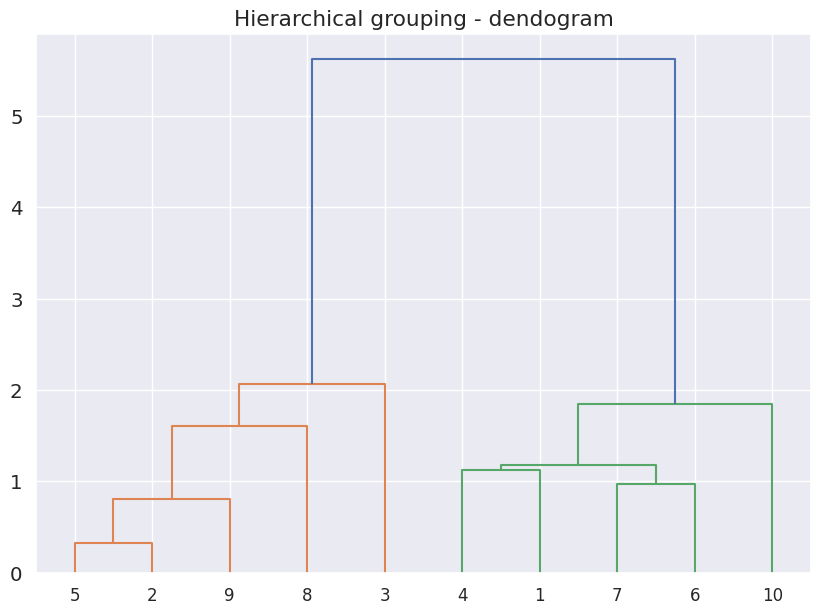

In [20]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# carry out hierarchical grouping
linked=linkage(data)
# Hierarchical grouping visualisation as dendogram
plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', labels=range(1, 11), distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical grouping - dendogram")
plt.show()



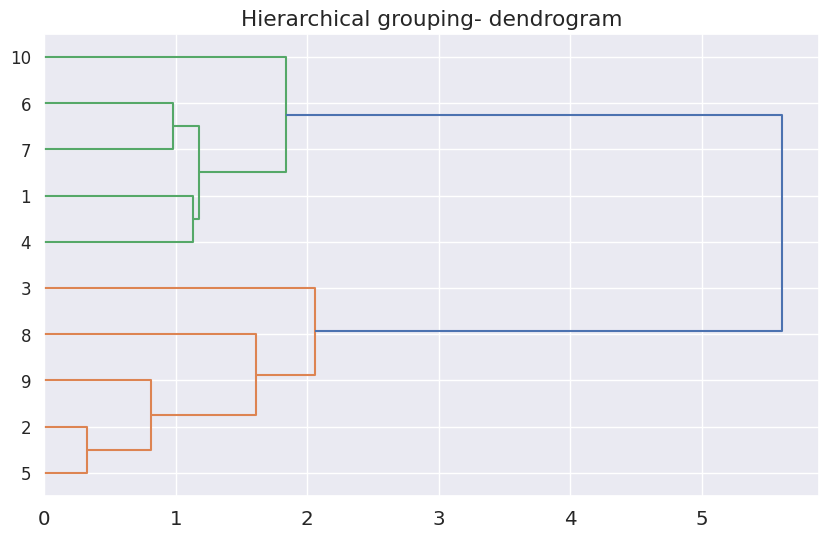

In [22]:
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='right', labels=range(1, 11), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical grouping- dendrogram')
plt.show()

### <a name='4'></a> Hierarchical grouping

In [24]:
# botton-up approach

from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering (n_clusters=2)

cluster.fit_predict(data)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

### <a name='5'></a> Clusters visualisation

In [28]:
df=pd.DataFrame(data, columns=['x1','x2'])
df['cluster']=cluster.labels_

fig=px.scatter(df,'x1','x2','cluster',width=950, height=500,template='plotly_dark',title='Hierarchical grouping', color_continuous_midpoint=0.6)
fig.update_traces(marker_size=12)
fig.show()


### <a name='6'></a> Compare metrics (Euclideas, Manhattan, cosinius)

In [32]:
data=make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df,'x1','x2', width=900, height=500,title='Hierachical grouping', template='plotly_dark')

Euclidean distance

In [33]:
cluster_euclidean= AgglomerativeClustering(n_clusters=4)
cluster_euclidean.fit_predict(data)

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 0, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 3, 0, 2, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 0, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 0, 1, 2, 0, 3, 2, 0, 2, 1, 0, 0, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [37]:
df_euclidean=pd.DataFrame(data, columns=['x1','x2'])
df_euclidean['cluster']=cluster_euclidean.labels_
fig=px.scatter(df_euclidean,'x1','x2','cluster', width=900, height=500, template='plotly_dark',title='Hierachical grouping- euclidean metric', color_continuous_midpoint=0.6)
fig.show()

Manhattan distance

In [41]:
cluster_manhattan = AgglomerativeClustering(n_clusters=4, metric='manhattan', linkage='complete')
cluster_manhattan.fit_predict(data)

array([0, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 0, 0, 3, 3, 3, 0, 0, 0, 2, 2, 0,
       1, 1, 2, 2, 0, 0, 3, 2, 3, 3, 3, 0, 0, 1, 3, 2, 1, 1, 2, 3, 2, 1,
       2, 0, 0, 2, 1, 2, 3, 0, 2, 1, 0, 1, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0,
       3, 3, 2, 0, 0, 0, 2, 3, 2, 1, 2, 0, 2, 0, 3, 0, 0, 0, 2, 0, 3, 3,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 3, 2, 1, 1, 1, 1, 2, 2, 0, 3, 0,
       1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 0, 3, 1, 2, 1, 3, 2, 1, 3, 2, 0, 3,
       2, 1, 2, 0, 0, 3, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 3, 3,
       1, 2, 0, 2, 2, 1, 3, 0, 2, 3, 0, 0, 2, 3, 0, 3, 2, 0, 1, 2, 0, 0,
       3, 1, 3, 1, 2, 2, 0, 3, 0, 3, 2, 1, 0, 3, 2, 0, 2, 2, 0, 0, 3, 3,
       3, 1, 0, 3, 2, 0, 2, 2, 3, 0, 2, 3, 3, 0, 3, 3, 2, 0, 3, 0, 1, 2,
       0, 1, 3, 0, 1, 0, 2, 3, 3, 0, 0, 3, 0, 1, 3, 3, 1, 3, 3, 2, 3, 1,
       3, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 2, 2, 2, 1, 2,
       1, 0, 3, 2, 0, 1, 2, 0, 2, 3, 0, 0, 2, 1, 3, 2, 0, 3, 1, 2, 3, 0,
       0, 3, 0, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 0, 3,

In [42]:
df_manhattan=pd.DataFrame(data, columns=['x1','x2'])
df_manhattan['cluster']=cluster_manhattan.labels_
fig=px.scatter(df_manhattan,'x1','x2','cluster', width=900, height=500, template='plotly_dark',title='Hierachical grouping- manhattan metric', color_continuous_midpoint=0.6)
fig.show()

### Cosine metric

In [52]:
cluster_cosine= AgglomerativeClustering(n_clusters=4, metric='cosine', linkage='complete')
cluster_cosine.fit_predict(data)

array([2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 3, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 0, 1, 0, 2,
       0, 2, 2, 0, 2, 0, 1, 3, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 3,
       1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 3, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 2, 1, 0, 3, 2, 0, 2, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 3, 2, 2, 1, 1,
       1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 3, 3, 2, 0, 0, 3, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 3, 2, 0,
       2, 2, 1, 0, 3, 2, 0, 3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 3,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,

In [54]:
df_cosine =pd.DataFrame(data, columns=['x1','x2'])
df_cosine['cluster']=cluster_cosine.labels_
fig=px.scatter(df_cosine,'x1','x2','cluster', width=900, height=500, template='plotly_dark',title='Hierachical grouping- cosine metric', color_continuous_midpoint=0.6)
fig.show() 


###Submission of metrics

In [63]:
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=3, column_titles=['euclidean', 'Manhattan', 'cosine'])

fig1=px.scatter(df_euclidean,'x1','x2','cluster')['data'][0]
fig2=px.scatter(df_manhattan,'x1','x2','cluster')['data'][0]
fig3=px.scatter(df_cosine,'x1','x2','cluster')['data'][0]

fig.add_trace(fig1,row=1,col=1)
fig.add_trace(fig2,row=1,col=2)
fig.add_trace(fig3,row=1,col=3)

fig.update_layout(template='plotly_dark')
fig.show()



